In [265]:
import numpy as np
import matplotlib.pyplot as plt

# Notes on
[Р.В. Шамин. Лекция 2. Оптимизационные задачи математической экономики и эволюционные методы](http://www.mathnet.ru/php/seminars.phtml?presentid=19427)

- [x] Сформулируем обшую оптимизационную задачу
- [x] Экономический смысл и примеры 
- [x] Принципиальные инструменты для решения поставленных задач

## Сформулируем обшую оптимизационную задачу

Пусть $U$ - множество возможных рещений, $|U| > 1$, 
$U$ не пусто и  содержит более одного элемента.

Задана действитейльная функция $F:\mapsto\ mathbb{R}$

Смысл задачи в нахождении **максимума**(минимума) функции.

Для формулировки задачи, мы сделаем предположение что $\inf_{u\in U}F(u)>-\infty$

* $\max_{u\in U} F(u) = I^*$ 
* Найти $u^*\in U$, такой что $F(u^*) = \max_{u\in U} F(u)$

В случае поиска $\sup_{u\in U}$ 

* $\sup_{u\in U} F(u) = I^*$
* Найти максимизирующую последовательность $\{u_K\}\in U$, таукю что $\lim_{K \to \infty}F(u_K)=\sup_{u\in U} F(u) = I^*$

## Экономический смысл и примеры 

Пусть ${\color{red}U\in \mathbb{R}^2}$, тогда существует ${\color{blue}F(x_1, x_2)=c_1x_1+c_2x_2}$

<img src="https://grasswiki.osgeo.org/w/images/archive/20080810135248%21Concave_hull.jpg" width="40%" align='left'>

"Путь" частиц в локальные оптимумы имеет экономическуий смысл, как последовательность принимаемых решений и определение точек контроля проекта. Наивная оценка путей иногда имеет смысл, позволяя определить "не очень хорошие" оптимумы. 

По мимо всего прочего в реальных задачах модель из статической становиться динамической по времени, и изучение "путей" обретает решающий смысл.

## Принципиальные инструменты для решения поставленных задач

- [x] Метод имитации отжига
- [x] Метод роения частиц
- [x] Метод градиентного спуска(основной проблемой являеться угасание в локальных отмимумах)

### Метод имитации отжига

1. $T_0>0, K=0$
2. $u_0\in U$ - выбираем произвольно
3. $\overline{u}=G(u)$, $\overline{u}$ близкое к $u_K$(предполагаеться что $U$ метрическое пространство)
4. Если $F(\overline{u})>F(u_K)$, то $u_{K+1}=\overline{u}$, $K = K + 1$, переход в 3.
5. $\Delta = F(\overline{u}) - F(u_K) < 0 $
6. $\xi \sim  \mathbb{R}(0, 1)$, Если $\xi < \exp(\frac{\Delta}{T_K})$, то $u_{K+1}=\overline{u}$, $T_{K+1}=\alpha T_K$, переход в 3.
7. Иначе $u_{K+1}=u_K$, $K = K + 1$, $T_{K+1}=\alpha T_K$, переход в 3.


In [266]:
# Simulated Annealing

class Anealing():
    def __init__(self, func, alpha = 0.95, t = 100, s = 10):
        self.F = func
        self.alpha = alpha
        self.T = t
        self.s = s
        self.x = []
        self.Fx = []
        self.temp = []

    def run(self):
        for i in range(100):
            if (i%10 == 0): print('Шаг: ' + str(i) + ' Температура: ' + str(self.T))
            s_ = self.s + np.random.uniform(-5, 5)
            d = self.F(s_) - self.F(self.s)
            if d < 0:
                self.s = s_
            else:
                if (np.random.uniform(0, 1) < np.exp(d / self.T)):
                    self.T *= self.alpha
                    self.s = s_
            self.x.append(self.s)
            self.Fx.append(self.F(self.s))
            self.temp.append(self.T)
        print('Best solution: ' + str(self.x[-1]))
        print('Best objective: ' + str(self.F(self.x[-1])))
        
    def draw_plot(self):
        fig = plt.figure()
        ax1 = fig.add_subplot(311)
        ax1.plot(self.temp, 'r.-')
        ax1.legend(['T'])
        ax2 = fig.add_subplot(312)
        ax2.plot(self.x,'b.-')
        ax2.legend(['x'])
        ax3 = fig.add_subplot(313)
        ax3.plot(self.Fx,'g.-')
        ax3.legend(['F(x)'])
        plt.tight_layout()
        plt.show()

In [267]:
def f(x): return x * (2 + np.abs(np.sin(8.0 * x)))
A = Anealing(f)
A.run()

Шаг: 0 Температура: 100
Шаг: 10 Температура: 69.83372960937498
Шаг: 20 Температура: 54.03600876626366
Шаг: 30 Температура: 44.012666865176534
Шаг: 40 Температура: 34.05616262881148
Шаг: 50 Температура: 29.198902433877237
Шаг: 60 Температура: 21.463876394293724
Шаг: 70 Температура: 15.777921478822675
Шаг: 80 Температура: 12.208654873684791
Шаг: 90 Температура: 8.525759033430816
Best solution: 42.36459528114398
Best objective: 100.25580952323395


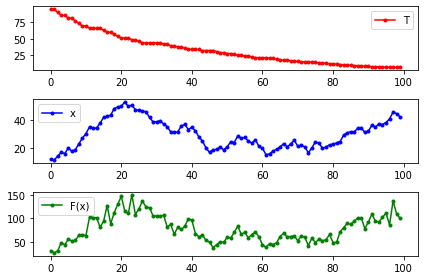

In [268]:
A.draw_plot()

### Метод роения частиц

1. $U\in \mathbb{N}^n$ предположим что решения лежат в области целых чисел
2. Создаем популяцию $u^1, u^2,... u^M$ со случайными координатами, такими что $u^m\in U$
3. Для каждого m = 1 ... M
    - Выбрать случайным образом $k\in \{1, 2,... n\}$
    - Выбираем случайным образом $\Delta \in \{-1,1\}$
    - $\overline{u}^m_k = {u}^m_k + \Delta$
    - Если $\overline{u}^m_k \in U$ и $F(\overline{u}^m) > F(u^m)$, то $u^m=\overline{u}^m$


In [269]:
# Particle swarm optimization

class Swarm:
    def __init__(self, func, alpha=0.95, beta=0.2, gamma=0.2):
        self.F = func
        self.N = 2
        self.M = 100
        self.L = 100
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.X = []
        self.V = []
        self.Xmin = []
        self.XMinAll = np.zeros(self.N)

    def calc_min_all(self, xmin):
        res = xmin[0]
        for x in xmin:
            if self.F(x) < self.F(res):
                res = x
        return res

    def run(self):
        for m in range(self.M):
            x = np.zeros(self.N)
            x[0] = np.random.uniform(-100, 100)
            x[1] = np.random.uniform(-100, 100)

            self.X.append(x)
            self.Xmin.append(x)

            v = np.zeros(self.N)
            v[0] = np.random.uniform(-10, 10)
            v[1] = np.random.uniform(-10, 10)

            self.V.append(v)

        self.XMinAll = self.calc_min_all(self.Xmin)

        for l in range(self.L):
            for m in range(self.M):
                self.V[m] = self.alpha * self.V[m] + \
                            self.beta * np.random.uniform() * (self.Xmin[m] - self.X[m]) + \
                            self.gamma * np.random.uniform() * (self.XMinAll - self.X[m])

                self.X[m] = self.X[m] + self.V[m]

                if F(self.X[m]) < F(self.Xmin[m]):
                    self.Xmin[m] = self.X[m]

            self.XMinAll = self.calc_min_all(self.Xmin)
            if l % 10 == 0: print(f"{self.XMinAll} Значение = {F(self.XMinAll)}")

In [270]:
def F(x): return (1 - x[0]) * (1 - x[0]) + 100 * (x[1] - x[0] * x[0]) * (x[1] - x[0] * x[0])
S = Swarm(F)
S.run()

[ 7.25603993 55.11192344] Значение = 645.1879054747429
[ 8.77539684 77.3383107 ] Значение = 71.39443476377095
[-7.08182025 49.91093532] Значение = 71.13562106003306
[-5.13766014 26.53236428] Значение = 39.54263996318209
[-5.13766014 26.53236428] Значение = 39.54263996318209
[0.46647398 0.43581277] Значение = 5.046419908779538
[0.44144403 0.14970093] Значение = 0.5160348488408157
[1.19924113 1.45183462] Значение = 0.058343854875226975
[1.19924113 1.45183462] Значение = 0.058343854875226975
[1.11648479 1.23850927] Значение = 0.02001521746785502


### Метод градиентного спуска

In [271]:
# m denotes the number of examples here, not the number of features
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        if i%1000==0: print(f"Шаг {i} | Значение : {cost}")
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    return theta


def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 10)
m, n = np.shape(x)
numIterations= 100000
alpha = 0.0005
theta = np.ones(n)
theta = gradientDescent(x, y, theta, alpha, m, numIterations)
print(theta)

Шаг 0 | Значение : 442.641611137812
Шаг 1000 | Значение : 91.19696731070769
Шаг 2000 | Значение : 71.76828467698726
Шаг 3000 | Значение : 56.693504098738366
Шаг 4000 | Значение : 44.996930853574725
Шаг 5000 | Значение : 35.92152010584691
Шаг 6000 | Значение : 28.879878206666746
Шаг 7000 | Значение : 23.416244436845183
Шаг 8000 | Значение : 19.176992512629546
Шаг 9000 | Значение : 15.887742604220618
Шаг 10000 | Значение : 13.335602473513688
Шаг 11000 | Значение : 11.355388312797624
Шаг 12000 | Значение : 9.818933446891005
Шаг 13000 | Значение : 8.626792918962128
Шаг 14000 | Значение : 7.70180705060607
Шаг 15000 | Значение : 6.984107386335065
Шаг 16000 | Значение : 6.427241789015077
Шаг 17000 | Значение : 5.995167888306871
Шаг 18000 | Значение : 5.659920287141153
Шаг 19000 | Значение : 5.399800539331491
Шаг 20000 | Значение : 5.197972747080908
Шаг 21000 | Значение : 5.041373880336891
Шаг 22000 | Значение : 4.919868289892408
Шаг 23000 | Значение : 4.825591691241215
Шаг 24000 | Значение : 